Random forest Model  
Model Tuning?  
Wine data is presented  
Data analysis  
Data Pre processing  
Train test split  
Random Forest model  
trained random forest model  
New data is given to the trained random forest model  
predict the vine quality  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection  

In [2]:
# loading the dataset to a Pandas dataFrame
wine = pd.read_csv(r'C:\Users\ramesh.annasamudram\Documents\AI_ML_Workspace\ML_Projects\WineQualityPrediction\WineQuality-red_New.csv')

In [3]:
wine.shape

(1599, 12)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# checking for missing values 
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization  

In [6]:
# statistical measures
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


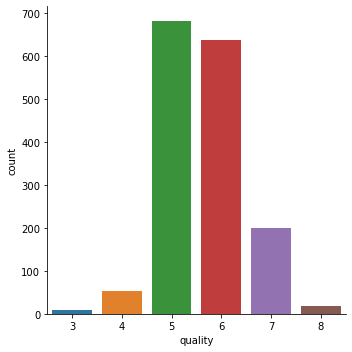

In [7]:
sns.catplot(x='quality', data=wine, kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

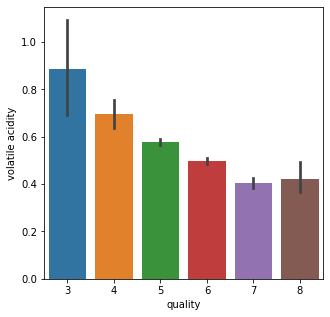

In [8]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

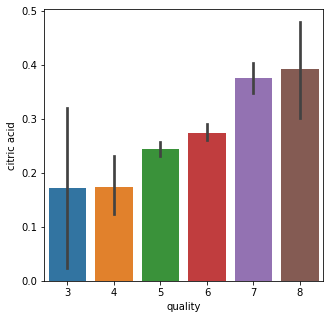

In [9]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

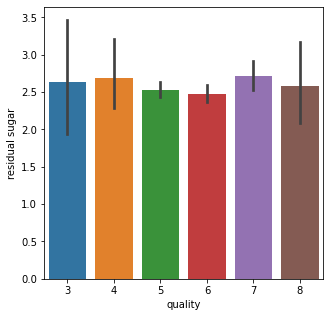

In [10]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

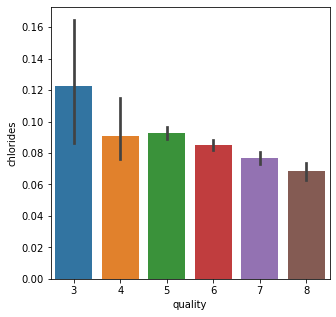

In [11]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

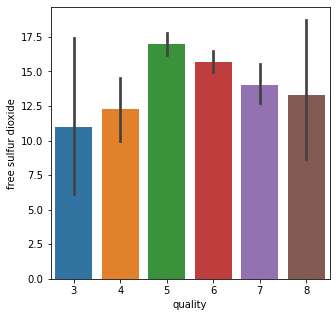

In [12]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

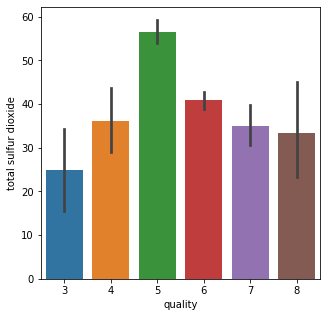

In [13]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

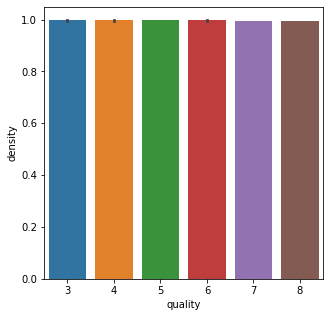

In [14]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=wine)

Correlation  

In [15]:
correlation = wine.corr()

Heatmap to understand the correlation between features

<AxesSubplot:>

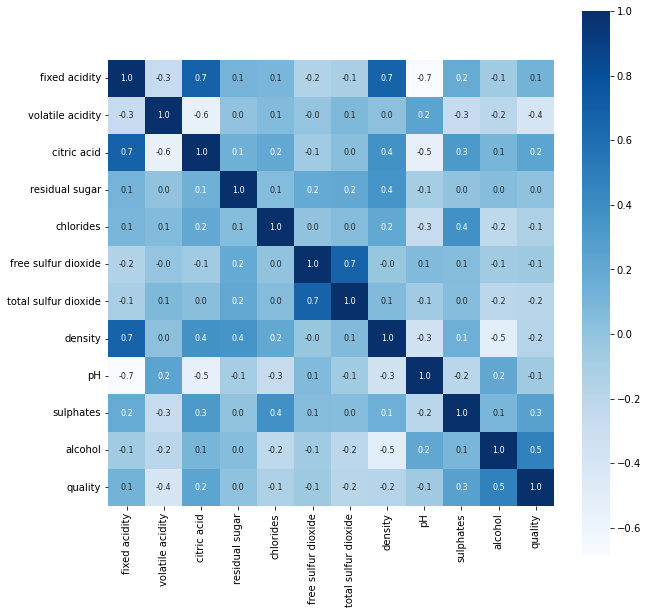

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Data Preprocessing  
> Separate data and label  

In [17]:
X = wine.drop('quality', axis=1)

Label binarization 

In [18]:
Y = wine['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train and Test split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [20]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training:  
Random Forest classifier model   (ensemble model of decision tree)

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation  
Accuracy Score  

In [23]:
# Accuracy on test data
X_test_prediction  = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [24]:
print('Accuracy: ', test_data_accuracy)

Accuracy:  0.93125


Building a predictive system  

In [25]:
input_data = (7.1,0.71,0,1.9,0.08,14,35,0.9972,3.47,0.55,9.4)
# changing the input data in a numpy array
input_data_asnumpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only 1 instance. 
# if the input data is not reshaped, the model will expect all the values in X_train, X_test. 
input_data_reshaped = input_data_asnumpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


In the input data the value of the quality of wine was 5. quality greater than 7 is a good quality wine other wise its not a good quality wine. 
Since the value was 5, 0 (bad quality) was returned